In [1]:
from utils.data import CarDataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [2]:
BATCH_SIZE = 8

In [3]:
dataset = CarDataset()
dloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

Batch 0


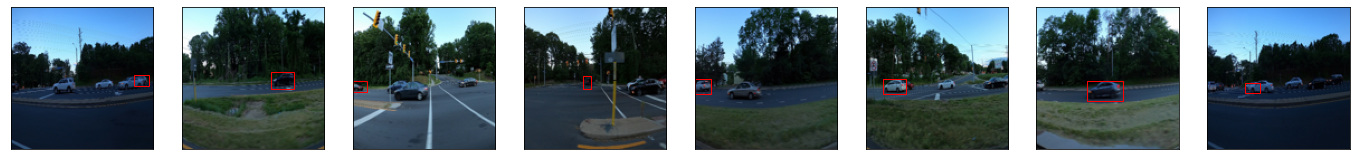

Batch 1


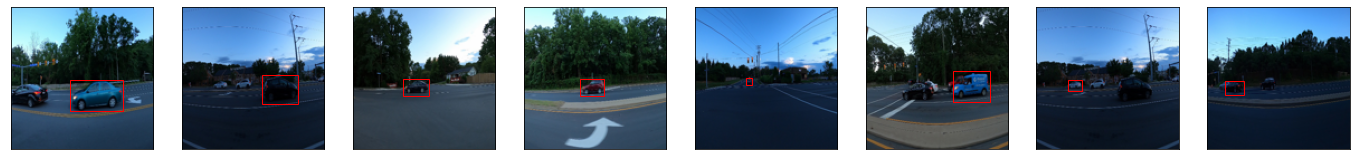

Batch 2


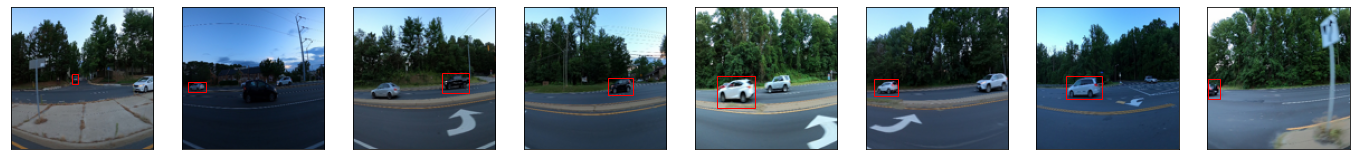

Batch 3


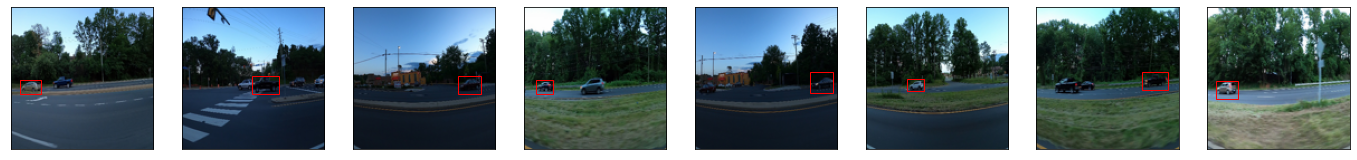

In [4]:
for b, (images, bboxes) in enumerate(dloader):
    print(f"Batch {b}")
    
    images = images.numpy().transpose(0, 2, 3, 1) + 0.5
    bboxes = bboxes.numpy().astype(np.int32)
    
    fig, axes = plt.subplots(1, BATCH_SIZE, figsize=(BATCH_SIZE*3, 3))
    
    for i in range(BATCH_SIZE):
        axes[i].imshow(images[i])
        axes[i].set_xticks([])
        axes[i].set_yticks([])
        
        xy = bboxes[i, :2]
        width, height = bboxes[i, 2] - bboxes[i, 0], bboxes[i, 3] - bboxes[i, 1]
        
        axes[i].add_patch(patches.Rectangle(xy, width, height, fill=False, edgecolor="red"))
        
    plt.show()
    
    if b == 3:
        break